In [ ]:
import matplotlib as mp
import seaborn as sb
import pandas as pd 
import numpy as np
from numpy import math
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [1]:
pip install jupyterthemes

In [2]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [3]:
!jt - t

In [15]:
import nltk

In [16]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
df=pd.read_csv("fakenews.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [21]:
df.shape

(20800, 5)

In [22]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [23]:
df=df.fillna('')
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [24]:
#merging author and news title
df["contents"]=df["author"] +df["title"]

In [25]:
df.head(2)

,id,title,author,text,label,contents
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."


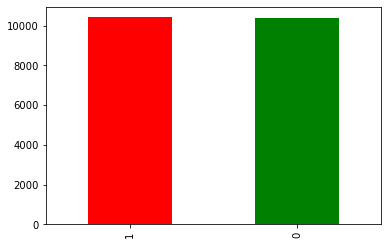

In [57]:
df["label"].value_counts().plot(kind="bar",color=["red","green"])
plt.show()

In [26]:
df["contents"]

0        Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1        Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2        Consortiumnews.comWhy the Truth Might Get You ...
3        Jessica Purkiss15 Civilians Killed In Single U...
4        Howard PortnoyIranian woman jailed for fiction...
                               ...                        
20795    Jerome HudsonRapper T.I.: Trump a ’Poster Chil...
20796    Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat...
20797    Michael J. de la Merced and Rachel AbramsMacy’...
20798    Alex AnsaryNATO, Russia To Hold Parallel Exerc...
20799               David SwansonWhat Keeps the F-35 Alive
Name: contents, Length: 20800, dtype: object

In [27]:
X=df.drop("label",axis=1)
y=df["label"]

In [28]:
print(X)
print(y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [29]:
port_stem=PorterStemmer()

In [30]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [32]:
df["contents"]=df["contents"].apply(stemming)

In [33]:
print(df["contents"])

0        darrel lucushous dem aid even see comey letter...
1        daniel j flynnflynn hillari clinton big woman ...
2                consortiumnew comwhi truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoyiranian woman jail fiction unpub...
                               ...                        
20795    jerom hudsonrapp trump poster child white supr...
20796    benjamin hoffmann f l playoff schedul matchup ...
20797    michael j de la merc rachel abramsmaci said re...
20798    alex ansarynato russia hold parallel exercis b...
20799                        david swansonwhat keep f aliv
Name: contents, Length: 20800, dtype: object


In [52]:
X=df["contents"].values
y=df["label"].values

In [36]:
print(X)
print(y)

['darrel lucushous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynnflynn hillari clinton big woman campu breitbart'
 'consortiumnew comwhi truth might get fire' ...
 'michael j de la merc rachel abramsmaci said receiv takeov approach hudson bay new york time'
 'alex ansarynato russia hold parallel exercis balkan'
 'david swansonwhat keep f aliv']
[1 0 1 ... 0 1 1]


In [37]:
y.shape

(20800,)

In [50]:
vec= TfidfVectorizer()

In [53]:
vec.fit(X)

TfidfVectorizer()

In [54]:
X=vec.transform(X)

In [55]:
print(X)

  (0, 26340)	0.28088379401596425
  (0, 22724)	0.2552336018069161
  (0, 15019)	0.43006226759639316
  (0, 14555)	0.29177259684200296
  (0, 12782)	0.24619727512767195
  (0, 8022)	0.23133661742488731
  (0, 6273)	0.2839932825877813
  (0, 5969)	0.35488202138141456
  (0, 5006)	0.2472595823572816
  (0, 4211)	0.3625320323150658
  (0, 578)	0.2694167078545385
  (1, 27923)	0.36911845953845024
  (1, 11313)	0.24166773097712638
  (1, 8772)	0.5258635625386451
  (1, 5916)	0.31810058109638056
  (1, 4767)	0.23338756776626793
  (1, 3859)	0.45980466668763476
  (1, 3281)	0.18652439327549428
  (1, 2622)	0.3562953366945267
  (2, 26235)	0.3665032495181434
  (2, 16361)	0.43295215406038445
  (2, 9454)	0.30743020569262086
  (2, 8567)	0.3411947414020896
  (2, 5240)	0.40440534260277944
  (2, 5121)	0.5511414848555652
  :	:
  (20797, 25776)	0.08220218573989037
  (20797, 25319)	0.3119640221826561
  (20797, 22086)	0.24902354987792552
  (20797, 20778)	0.2729578683228216
  (20797, 20493)	0.249994989010826
  (20797, 17505

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=42)

In [59]:
le=LogisticRegression()

In [60]:
y_test

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [61]:
le.fit(X_train, y_train)

LogisticRegression()

In [62]:
y_pred=le.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred)

0.9497596153846154

In [64]:
X_new=X_test[0]

In [65]:
le.predict(X_new)

array([1], dtype=int64)

In [66]:
y_test[0]

1